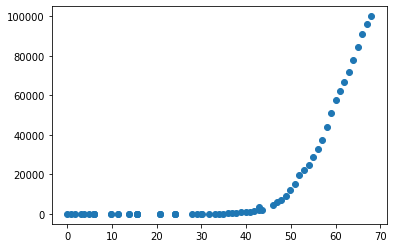

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(x, a, k, b):
    return a * numpy.exp(k*x) + b

germany = pandas.read_csv('germany.csv',  sep='\t', index_col=None, header=0)


xdata = germany['Timestamps'].to_numpy()
xdataInDays= (xdata-xdata[0]) / (24*3600)
ydata = germany['Confirmed'].to_numpy()
plt.scatter(xdataInDays, ydata, label='data')




y ≈ 0.023737886961709545 * exp(0.2648374272261151 s* x)
y ≈ 1.1106883473260991 * exp(4.531259332856919 * x)


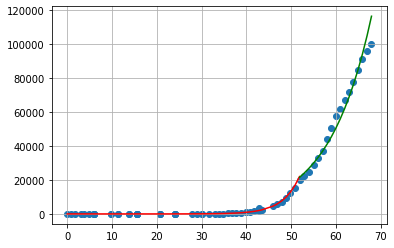

In [2]:

a, b = numpy.polyfit(xdataInDays[33:53], numpy.log(ydata[33:53]), 1)
c, d = numpy.polyfit(xdataInDays[52:], numpy.log(ydata[52:]), 1)
 
print(f"y ≈ {numpy.exp(b)} * exp({a} s* x)")
non_quarantine = numpy.array([numpy.exp(b) * numpy.exp(a * x) for x in xdataInDays])
print(f"y ≈ {numpy.exp(c)} * exp({d} * x)")
quarantine = numpy.array([numpy.exp(d) * numpy.exp(c * x) for x in xdataInDays])

plt.scatter(xdataInDays, ydata, label='data')
plt.plot(xdataInDays[:53], non_quarantine[:53], color='red')
plt.plot(xdataInDays[52:], quarantine[52:], color='green')
plt.grid()
plt.show()
